In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# REGRESSION EXAMPLE FOR XGB
# BOSTON DATASET

### DATASET INPUT

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [8]:
data['PRICE'] = boston.target

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### XGB Regressor 

In [12]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [13]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [16]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

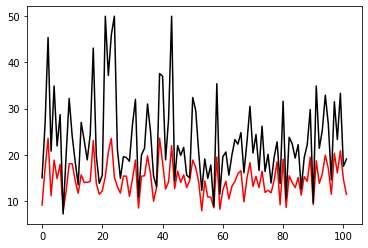

In [17]:
plt.plot(preds,color='red')
plt.plot(y_test.values,color='black')

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.517005


### HYPERPARAMETER TUNING

### NUMBER OF TREES AND EARLY STOPPING

In [19]:
params = {"objective":'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [20]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.680257,0.025607,21.719121,0.019025
1,19.740500,0.072068,19.818879,0.061769
2,18.007202,0.119744,18.109862,0.129375
3,16.463925,0.115087,16.587235,0.182339
4,14.990313,0.112001,15.132976,0.166282


In [21]:
cv_results["test-rmse-mean"].tail(1)

49    3.862102
Name: test-rmse-mean, dtype: float64

### GRID SEARCH 

In [22]:
# Create the parameter grid: gbm_param_grid
param_grid = {
    "eta" : [0.001, 0.01, 0.1],
    'subsample':[0.1,0.5,0.8,1],
    "colsample_bytree": [0.1,0.5,0.8,1],
    "n_estimators": [5,10,15,25,50,100,150,200],
    "max_depth": [2, 5 , 10 , 20]
}

# Instantiate the regressor: gbm
xg_reg = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=xg_reg,param_grid=param_grid,
                        scoring="neg_mean_squared_error",cv=3,verbose=1)

In [23]:
grid_mse.fit(X_train,y_train)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4608 out of 4608 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.1, 0.5, 0.8, 1],
                         'eta': [0

In [24]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Lowest RMSE found:  3.230433326991615


In [25]:
preds = grid_mse.best_estimator_.predict(X_test)

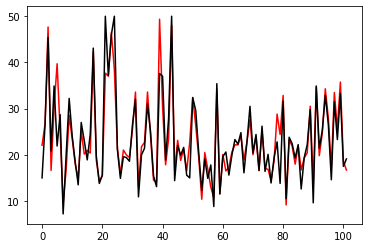

In [26]:
plt.plot(preds,color='red')
plt.plot(y_test.values,color='black')

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.707358


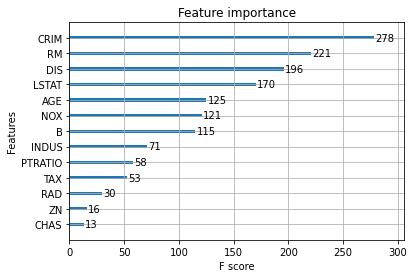

In [28]:
xgb.plot_importance(grid_mse.best_estimator_)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

<br/>

# CLASSIFICATION EXAMPLE FOR XGB
# DIABETES DATASET

### DATASET INPUT

In [29]:
data = pd.read_csv('diabetes.csv')

In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [32]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)

In [33]:
xgb_class = xgb.XGBClassifier(objective= 'binary:logistic',use_label_encoder=False,eval_metric='logloss')

In [34]:
train_model1 = xgb_class.fit(X_trian, y_train)

In [35]:
pred1 = train_model1.predict(X_test)

In [36]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



### HYPERPARAMETER TUNING

In [37]:
param_test = \
{
"eta" : [0.001, 0.01, 0.1],
'subsample':[0.1,0.5,0.8,1],
"colsample_bytree": [0.1,0.5,0.8,1],
"n_estimators": [5,10,15,25,50,100],
"max_depth": [2, 5 , 10 , 20]
}

In [38]:
grid_roc = GridSearchCV(estimator = xgb_class,param_grid = param_test, scoring='roc_auc',cv=3)

In [39]:
train_model2 = grid_roc.fit(X_trian, y_train)

In [40]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_roc.best_params_)
print("BEST ROC AUC found: ", np.sqrt(np.abs(grid_roc.best_score_)))

Best parameters found:  {'colsample_bytree': 1, 'eta': 0.001, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.8}
BEST ROC AUC found:  0.9020532828041019


In [41]:
preds2 = grid_roc.best_estimator_.predict(X_test)

In [43]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



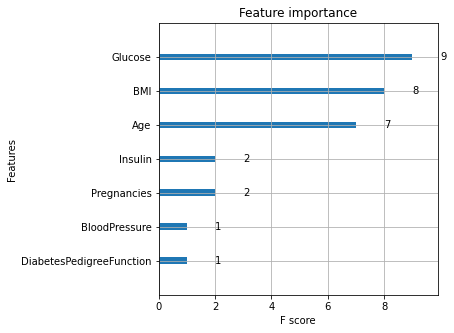

In [49]:
xgb.plot_importance(grid_roc.best_estimator_)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

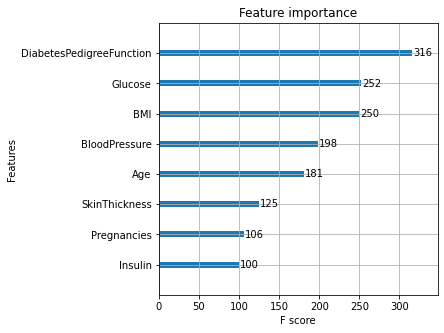

In [47]:
xgb.plot_importance(train_model1)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()